#**GATHERING DATA**

In [173]:
import pandas as pd   #Library for manipualtion and filtering the data.
import numpy as np  #Library for scientific computing.
import matplotlib.pyplot as plt  #Library for Data visualization.
import seaborn as sns 
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

In [174]:
#Importing Credit Card dataset using read_csv in pandas.
df_credit_card = pd.read_csv("Credit_card.csv")

#Dataset of Credit Card has 1548 'records' and 18 'features'.
df_credit_card.shape

(1548, 18)

In [175]:
#Importing Credit Card Label dataset using read_csv in pandas.
df_label = pd.read_csv("Credit_card_label.csv")

#Dataset of Credit Card labels has 1548 'records' and 2 'features'.
df_label.shape

(1548, 2)

In [176]:
#Combining common datset using merge on "Ind_ID" column.
df = pd.merge(df_credit_card, df_label, on='Ind_ID', how='inner')

#**DATA PREPARATION**

###Data Pre-Processing

In [177]:
#"head()" used to get first 5 rows of dataset.
df.head()

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members,label
0,5008827,M,Y,Y,0,180000.0,Pensioner,Higher education,Married,House / apartment,-18772.0,365243,1,0,0,0,NaN,2,1
1,5009744,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1
2,5009746,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,NaN,-586,1,1,1,0,NaN,2,1
3,5009749,F,Y,N,0,NaN,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1
4,5009752,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1


In [178]:
# sum(list(df["Type_Occupation"].value_counts().values))

In [179]:
# df[df["Type_Occupation"].isnull()]

In [180]:
#"describe()" used to give statistics for numerical parameteric column.
df.describe()

,Ind_ID,CHILDREN,Annual_income,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Family_Members,label
count,1.548000e+03,1548.000000,1.525000e+03,1526.000000,1548.000000,1548.0,1548.000000,1548.000000,1548.000000,1548.000000,1548.000000
mean,5.078920e+06,0.412791,1.913993e+05,-16040.342071,59364.689922,1.0,0.208010,0.309432,0.092377,2.161499,0.113049
std,4.171759e+04,0.776691,1.132530e+05,4229.503202,137808.062701,0.0,0.406015,0.462409,0.289651,0.947772,0.316755
min,5.008827e+06,0.000000,3.375000e+04,-24946.000000,-14887.000000,1.0,0.000000,0.000000,0.000000,1.000000,0.000000
25%,5.045070e+06,0.000000,1.215000e+05,-19553.000000,-3174.500000,1.0,0.000000,0.000000,0.000000,2.000000,0.000000
50%,5.078842e+06,0.000000,1.665000e+05,-15661.500000,-1565.000000,1.0,0.000000,0.000000,0.000000,2.000000,0.000000
75%,5.115673e+06,1.000000,2.250000e+05,-12417.000000,-431.750000,1.0,0.000000,1.000000,0.000000,3.000000,0.000000
max,5.150412e+06,14.000000,1.575000e+06,-7705.000000,365243.000000,1.0,1.000000,1.000000,1.000000,15.000000,1.000000


In [181]:
corr_df = df.corr()

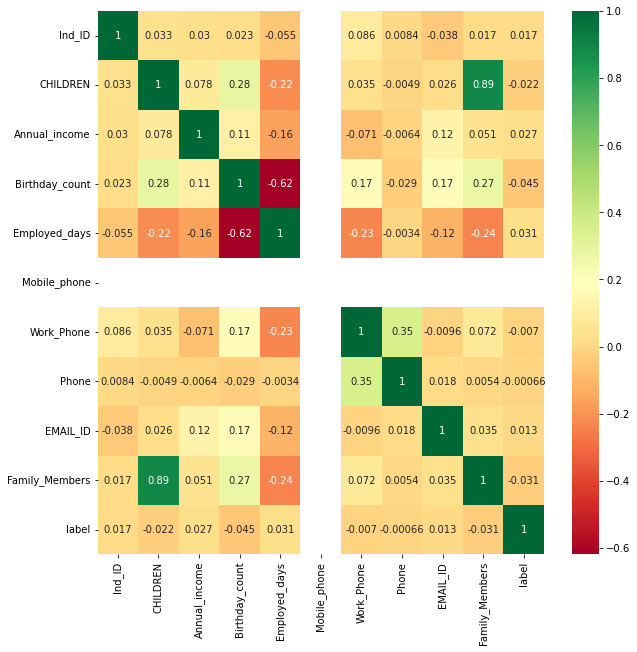

In [182]:
top_corr_fig = corr_df.index
plt.figure(figsize=(10,10))
sns.heatmap(df[top_corr_fig].corr(), annot=True, cmap ="RdYlGn")
plt.show()

In [183]:
#"nunique()" used to distinct values in each column in dataset.
df.nunique()

Ind_ID             1548
GENDER                2
Car_Owner             2
Propert_Owner         2
CHILDREN              6
Annual_income       115
Type_Income           4
EDUCATION             5
Marital_status        5
Housing_type          6
Birthday_count     1270
Employed_days       956
Mobile_phone          1
Work_Phone            2
Phone                 2
EMAIL_ID              2
Type_Occupation      18
Family_Members        7
label                 2
dtype: int64

In [184]:
#"isnull().sum()" give total null values in each column in dataset.
df.isnull().sum()

Ind_ID               0
GENDER               7
Car_Owner            0
Propert_Owner        0
CHILDREN             0
Annual_income       23
Type_Income          0
EDUCATION            0
Marital_status       0
Housing_type         0
Birthday_count      22
Employed_days        0
Mobile_phone         0
Work_Phone           0
Phone                0
EMAIL_ID             0
Type_Occupation    488
Family_Members       0
label                0
dtype: int64

In [185]:
#"isnull().sum().sum()" gives total null values.
df.isnull().sum().sum()

540

In [186]:
#Extracting out the values count in each column using loop and "value_counts()".
for i in df.columns[1:]:
  print(df[i].value_counts())
  print("-------------------")

F    973
M    568
Name: GENDER, dtype: int64
-------------------
N    924
Y    624
Name: Car_Owner, dtype: int64
-------------------
Y    1010
N     538
Name: Propert_Owner, dtype: int64
-------------------
0     1091
1      305
2      134
3       16
4        1
14       1
Name: CHILDREN, dtype: int64
-------------------
135000.0    170
112500.0    144
180000.0    137
157500.0    125
225000.0    119
           ... 
119700.0      1
69372.0       1
37800.0       1
333000.0      1
69750.0       1
Name: Annual_income, Length: 115, dtype: int64
-------------------
Working                 798
Commercial associate    365
Pensioner               269
State servant           116
Name: Type_Income, dtype: int64
-------------------
Secondary / secondary special    1031
Higher education                  426
Incomplete higher                  68
Lower secondary                    21
Academic degree                     2
Name: EDUCATION, dtype: int64
-------------------
Married                 1049
Si

###Data Cleaning





#####Replacing Categorical variable to Numerical variable.

In [187]:
#Replacing the "Male" to 1 and "Female" to 0.
df["GENDER"] = df["GENDER"].replace("M",1)
df["GENDER"] = df["GENDER"].replace("F",0)

In [188]:
#Replacing the "Yes" to 1 and "No" to 0.
df["Car_Owner"] = df["Car_Owner"].replace("Y",1)
df["Car_Owner"] = df["Car_Owner"].replace("N",0)

In [189]:
#Replacing the "Yes" to 1 and "No" to 0.
df["Propert_Owner"] = df["Propert_Owner"].replace("Y",1)
df["Propert_Owner"] = df["Propert_Owner"].replace("N",0)

In [190]:
#Droping some columns which are not relevant for the analysis and prediction.
df.drop(["Marital_status", "Mobile_phone", "Work_Phone", "Phone", "EMAIL_ID"], axis=1, inplace=True)

In [191]:
# df.isnull().sum()

In [192]:
# df[df["Annual_income"].isnull()]

#####Missing Values -  Pending (Mean or Median Imputation).

In [19]:
##USE KNN IMPUTATION

In [204]:
df.isnull().sum()

Ind_ID              0
GENDER              7
Car_Owner           0
Propert_Owner       0
CHILDREN            0
Annual_income      23
Type_Income         0
EDUCATION           0
Housing_type        0
Birthday_count     22
Employed_days       0
Type_Occupation     0
Family_Members      0
label               0
dtype: int64

In [203]:
df["Type_Occupation"].fillna("Missing", inplace = True)

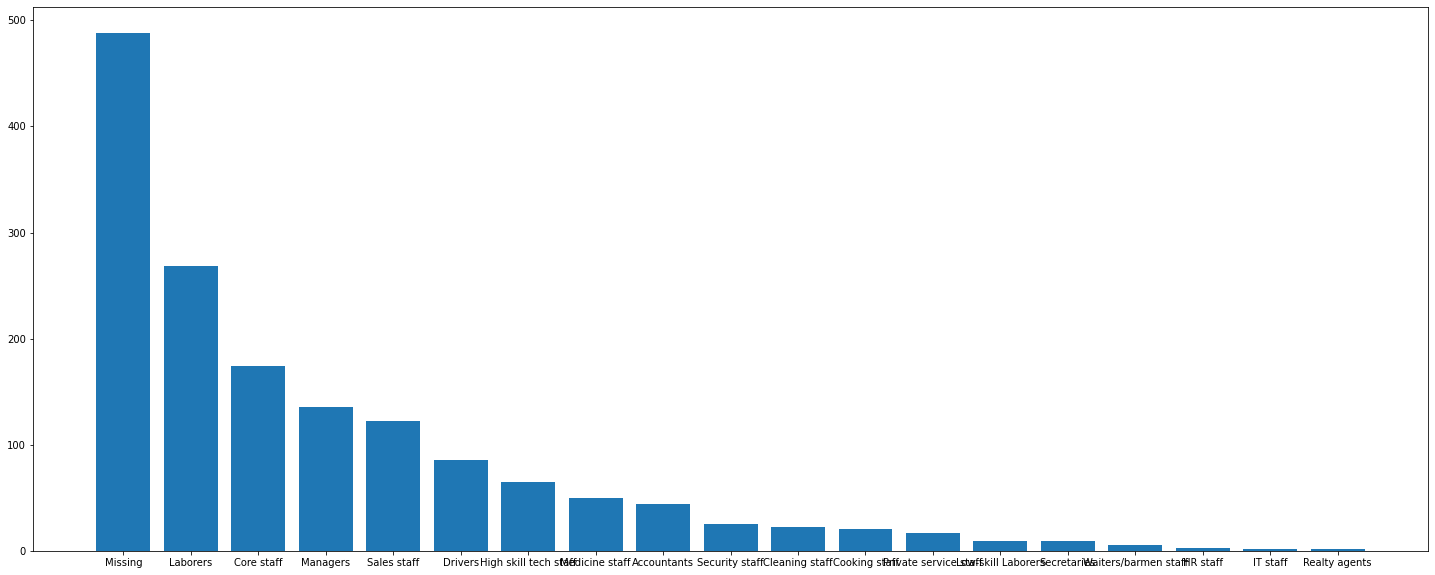

In [205]:
plt.figure(figsize = (25,10))
plt.bar(df["Type_Occupation"].value_counts().index,df["Type_Occupation"].value_counts().values)
plt.show()

In [206]:
df["Type_Occupation"].value_counts()

Missing                  488
Laborers                 268
Core staff               174
Managers                 136
Sales staff              122
Drivers                   86
High skill tech staff     65
Medicine staff            50
Accountants               44
Security staff            25
Cleaning staff            22
Cooking staff             21
Private service staff     17
Low-skill Laborers         9
Secretaries                9
Waiters/barmen staff       5
HR staff                   3
IT staff                   2
Realty agents              2
Name: Type_Occupation, dtype: int64

<AxesSubplot:xlabel='Annual_income', ylabel='Count'>

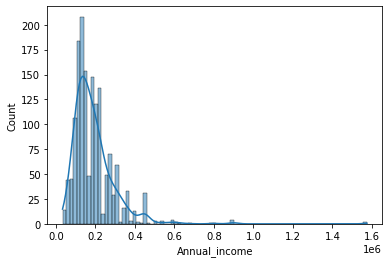

In [165]:
sns.histplot(df["Annual_income"], kde = True)

In [163]:
med_income = df["Annual_income"].median()

In [164]:
df["Annual_income"].fillna(med_income, inplace = True)

<AxesSubplot:xlabel='Age', ylabel='Count'>

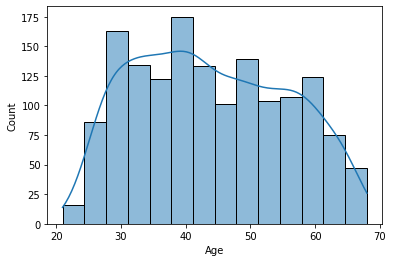

In [172]:
sns.histplot(df["Age"], kde = True)

#####Feature Engineering

*   In the dataset, there are some negative values in which needs to be converted.
*   In "Employed_days", 0 or positive value should be 0 as Experience.
*   "Birthday_count" and "Employed_days" columns need to converted into years with positive value in it.




In [166]:
print(df.shape)
df[df["Birthday_count"]>=0]

(1548, 14)


,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Housing_type,Birthday_count,Employed_days,Type_Occupation,Family_Members,label


In [167]:
#Renaming the "Birthday_count" to "Age" by dividing 365.
df.rename(columns = {"Birthday_count" : "Age"}, inplace=True) 
df["Age"] = round(abs(df["Age"]/365))

In [168]:
df[df["Employed_days"]>=0].head()

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Housing_type,Age,Employed_days,Type_Occupation,Family_Members,label
0,5008827,1.0,1,1,0,180000.0,Pensioner,Higher education,House / apartment,51.0,365243,NaN,2,1
7,5009894,0.0,0,0,0,180000.0,Pensioner,Secondary / secondary special,House / apartment,61.0,365243,NaN,2,1
26,5024916,0.0,0,1,0,112500.0,Pensioner,Secondary / secondary special,House / apartment,60.0,365243,NaN,2,1
27,5024917,0.0,0,1,0,166500.0,Pensioner,Secondary / secondary special,House / apartment,60.0,365243,NaN,2,1
31,5029311,0.0,0,1,0,112500.0,Pensioner,Secondary / secondary special,House / apartment,60.0,365243,NaN,2,1


In [169]:
df["Employed_days"][df["Employed_days"]>=0] = 0
df.shape

(1548, 14)

In [170]:
#Renaming the "Employed_days" to "Experience" by dividing 365.
df.rename(columns = {"Employed_days" : "Experience"}, inplace=True) 
df["Experience"] = round(abs(df["Experience"]/365),1)

####Dealing with Outliers.

#####Age

In [29]:
q3_age = df["Age"].quantile(0.75)
q1_age = df["Age"].quantile(0.25)
iqr_age = q3_age - q1_age
upper_age = q3_age + (1.5*iqr_age)
inner_age = q1_age - (1.5*iqr_age)
df.drop(df[(df["Age"]>upper_age)].index, inplace=True)
df.drop(df[(df["Age"]<inner_age)].index, inplace=True)

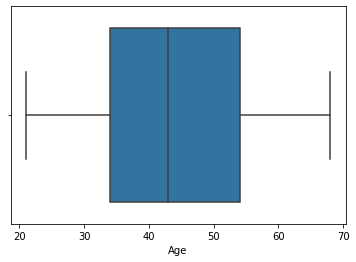

In [30]:
sns.boxplot(df["Age"])
plt.show()

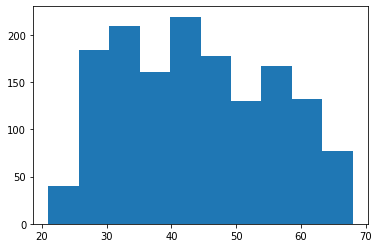

In [31]:
plt.hist(df["Age"])
plt.show()

#####Children

In [32]:
q3_child = df["CHILDREN"].quantile(0.75)
q1_child = df["CHILDREN"].quantile(0.25)
iqr_child = q3_child - q1_child
upper_child = q3_child + (1.5*iqr_child)
lower_child = q1_child - (1.5*iqr_child)
df.drop(df[(df["CHILDREN"]>upper_child)].index, inplace=True)
df.drop(df[(df["CHILDREN"]<lower_child)].index, inplace=True)

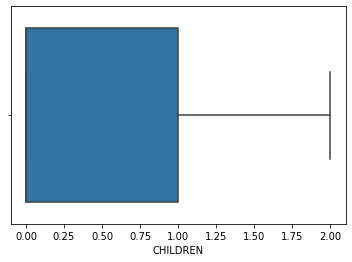

In [33]:
sns.boxplot(df["CHILDREN"])
plt.show()

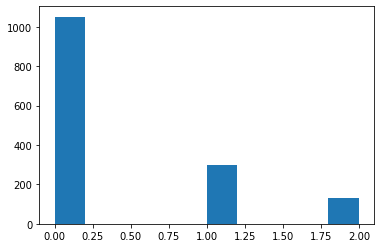

In [34]:
plt.hist(df["CHILDREN"])
plt.show()

#####Family Members

In [35]:
q3_fam = df["Family_Members"].quantile(0.75)
q1_fam = df["Family_Members"].quantile(0.25)
iqr_fam = q3_fam - q1_fam
upper_fam_member = q3_fam + (1.5*iqr_fam)
lower_fam_member = q1_fam - (1.5*iqr_fam)
df.drop(df[(df["Family_Members"]>upper_fam_member)].index, inplace=True)

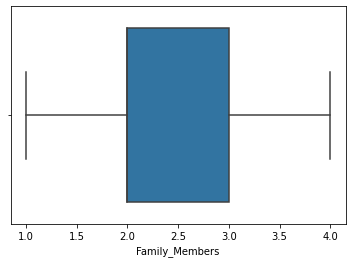

In [36]:
sns.boxplot(df["Family_Members"])
plt.show()

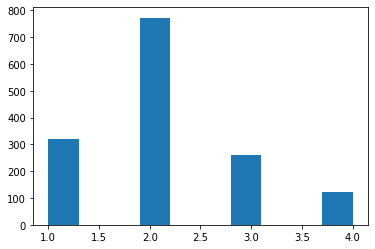

In [37]:
plt.hist(df["Family_Members"])
plt.show()

#####Experience

In [38]:
q3_exp = df["Experience"].quantile(0.75)
q1_exp = df["Experience"].quantile(0.25)
iqr_exp = q3_exp - q1_exp
upper_exp = q3_exp + (1.5*iqr_exp)
lower_exp = q1_exp - (1.5*iqr_exp)
df.drop(df[df["Experience"]>upper_exp].index, inplace=True)

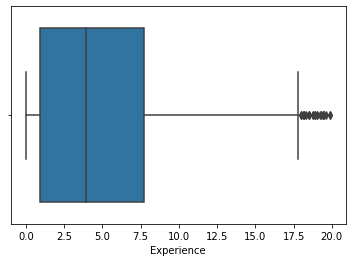

In [39]:
sns.boxplot(df["Experience"])
plt.show()

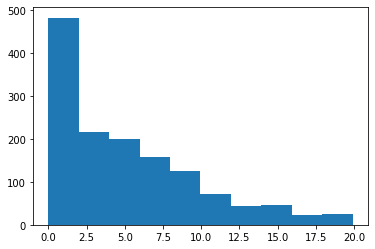

In [40]:
plt.hist(df["Experience"])
plt.show()

####Duplicates

In [41]:
df.drop_duplicates(inplace = True)

In [42]:
df.shape

(1398, 13)

In [43]:
df.drop(["Ind_ID"], axis=1, inplace=True)

In [44]:
df.shape

(1398, 12)

In [45]:
corr_df_new = df.corr()

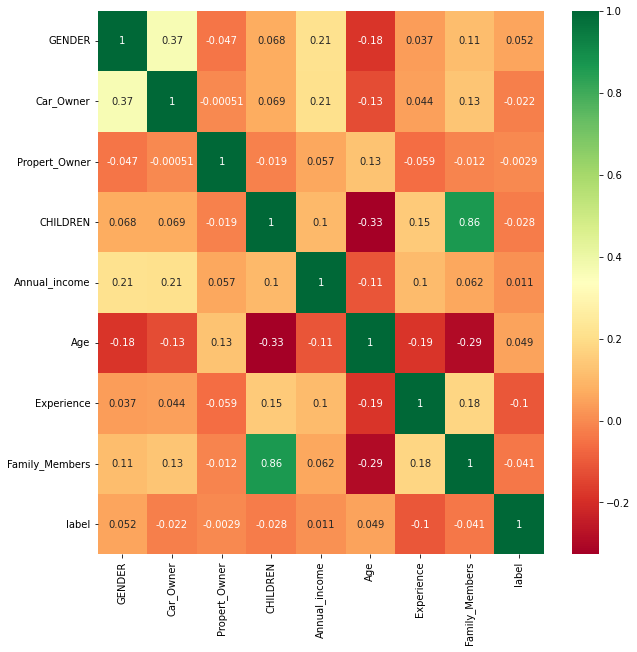

In [46]:
top_corr_fig = corr_df_new.index
plt.figure(figsize=(10,10))
sns.heatmap(df[top_corr_fig].corr(), annot=True, cmap ="RdYlGn")
plt.show()

#**EXPLORATORY DATA ANALYSIS**

In [47]:
df.head()

,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Housing_type,Age,Experience,Family_Members,label
0,1.0,1,1,0,180000.0,Pensioner,Higher education,House / apartment,51.0,0.0,2,1
1,0.0,1,0,0,315000.0,Commercial associate,Higher education,House / apartment,37.0,1.6,2,1
4,0.0,1,0,0,315000.0,Commercial associate,Higher education,House / apartment,37.0,1.6,2,1
6,0.0,1,0,0,315000.0,Commercial associate,Higher education,House / apartment,37.0,1.6,2,1
7,0.0,0,0,0,180000.0,Pensioner,Secondary / secondary special,House / apartment,61.0,0.0,2,1


#####Univariate Analysis

In [48]:
# df.hist(bins = 30, figsize = (15,10))
# plt.show()

In [49]:
# plt.pie(df["GENDER"].value_counts(), labels=["Female", "Male"], autopct='%1.2f%%')
# plt.show()

<AxesSubplot:xlabel='label', ylabel='count'>

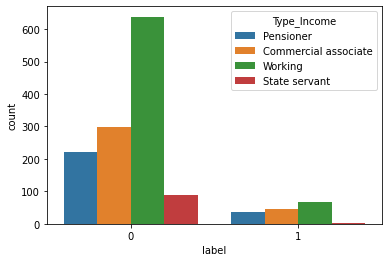

In [50]:
sns.countplot("label", hue = "Type_Income", data = df)

<AxesSubplot:xlabel='label', ylabel='count'>

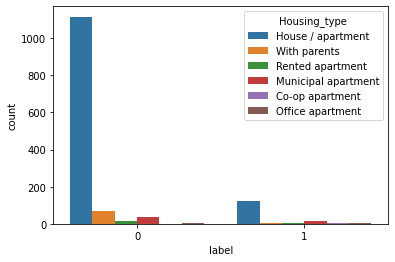

In [51]:
sns.countplot("label", hue = "Housing_type", data = df)

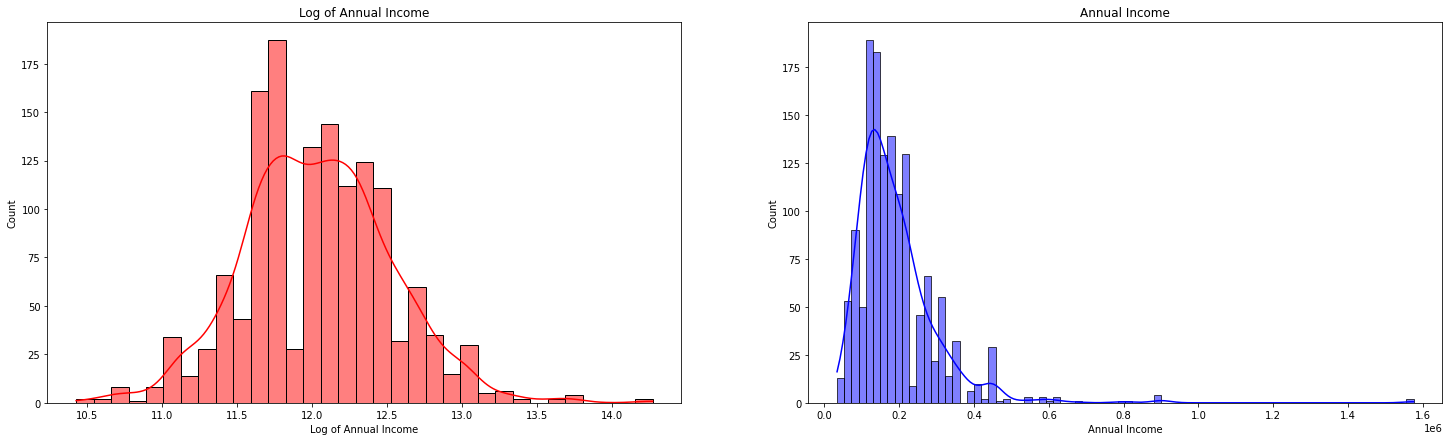

In [52]:
plt.figure(figsize = (25,7))
plt.subplot(1,2, 1)
plt.title("Log of Annual Income")
plt.xlabel("Log of Annual Income")
sns.histplot(np.log(df["Annual_income"]), kde =True, color ="r")
plt.subplot(1, 2, 2)
sns.histplot(df["Annual_income"], kde = True, color ="b")
plt.title("Annual Income")
plt.xlabel("Annual Income")
plt.show()

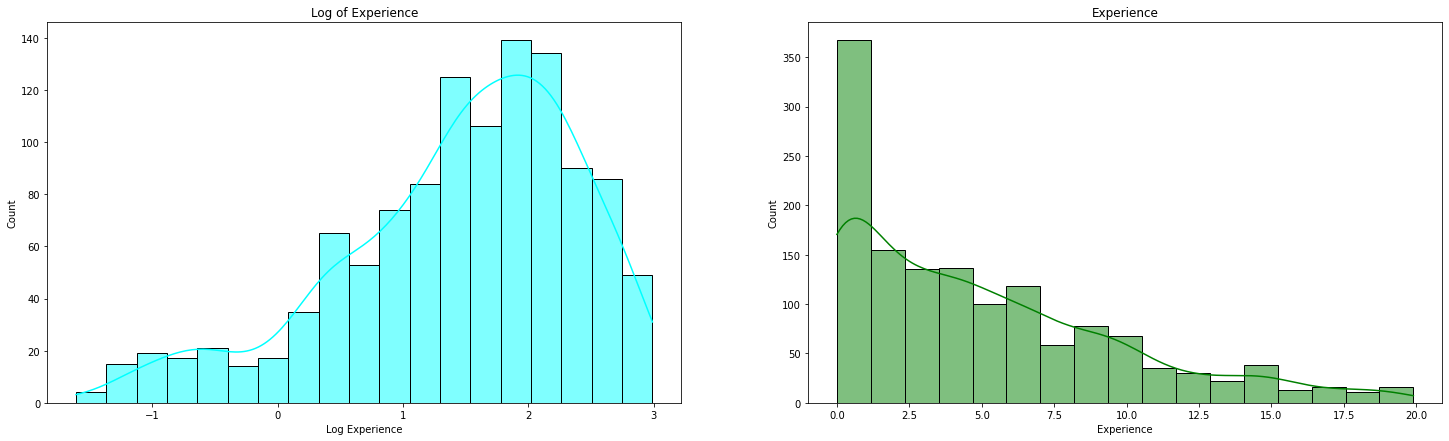

In [53]:
plt.figure(figsize = (25,7))
plt.subplot(1, 2, 1)
plt.title("Log of Experience")
plt.xlabel("Log Experience")
sns.histplot(np.log(df["Experience"]), kde =True, color ="cyan")
plt.subplot(1, 2, 2)
sns.histplot(df["Experience"], kde = True, color = "green")
plt.title("Experience")
plt.xlabel("Experience")
plt.show()

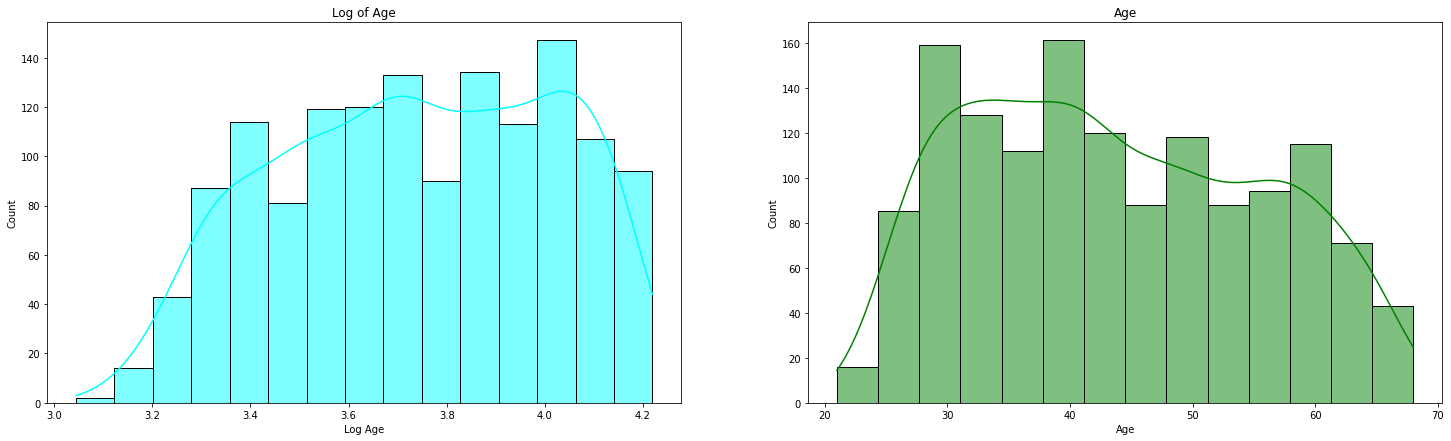

In [54]:
plt.figure(figsize = (25,7))
plt.subplot(1, 2, 1)
plt.title("Log of Age")
plt.xlabel("Log Age")
sns.histplot(np.log(df["Age"]), kde =True, color ="cyan")
plt.subplot(1, 2, 2)
sns.histplot(df["Age"], kde = True, color = "green")
plt.title("Age")
plt.xlabel("Age")
plt.show()

The log transformation extract out all the values into the center of the distribution making it look more like a "Normal distribution"

#####BivariateAnalysis

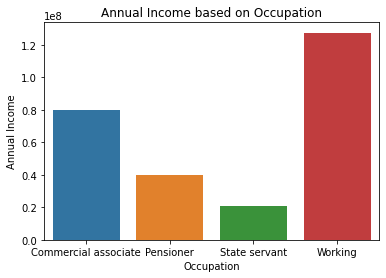

In [55]:
# cat = df[["Type_Income", "Annual_income"]].groupby(['Type_Income'], as_index=False).sum().sort_values(by='Annual_income', ascending=False)
cat = df[["Type_Income", "Annual_income"]].groupby(['Type_Income'], as_index=False).sum()
sns.barplot(x = "Type_Income", y = "Annual_income", data = cat)
plt.title("Annual Income based on Occupation")
plt.xlabel("Occupation")
plt.ylabel("Annual Income")
plt.show()

Car and Property Analysis with respect to Annual Income

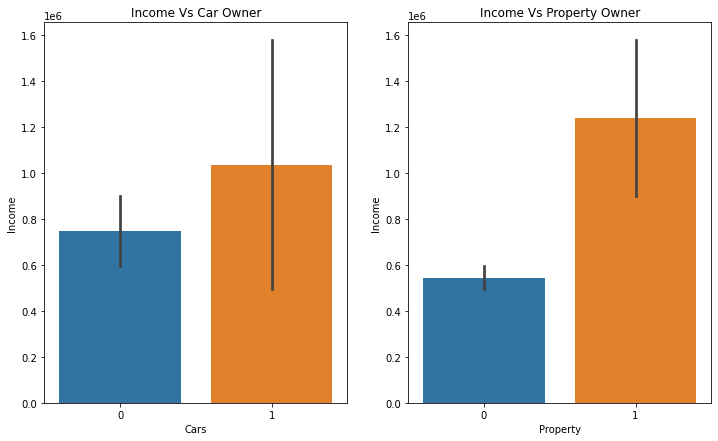

In [56]:
cat1 = df[["Car_Owner","Propert_Owner", "Annual_income"]].groupby(['Car_Owner','Propert_Owner'], as_index=False).agg({'Annual_income':'count','Annual_income':'max'})
plt.figure(figsize = (25,7))
plt.subplot(1, 4, 1)
sns.barplot(cat1["Car_Owner"], cat1["Annual_income"])
plt.title("Income Vs Car Owner")
plt.xlabel("Cars")
plt.ylabel("Income")
plt.subplot(1, 4, 2)
sns.barplot(cat1["Propert_Owner"], cat1["Annual_income"])
plt.title("Income Vs Property Owner")
plt.xlabel("Property")
plt.ylabel("Income")
plt.show()

Mean of Annual Income by the Age are :
 Experience
(0, 3]      193627.322034
(3, 6]      191744.262295
(6, 9]      212091.013825
(9, 12]     224679.545455
(12, 15]    200370.000000
(15, 18]    200531.250000
(18, 21]    171356.250000
Name: Annual_income, dtype: float64


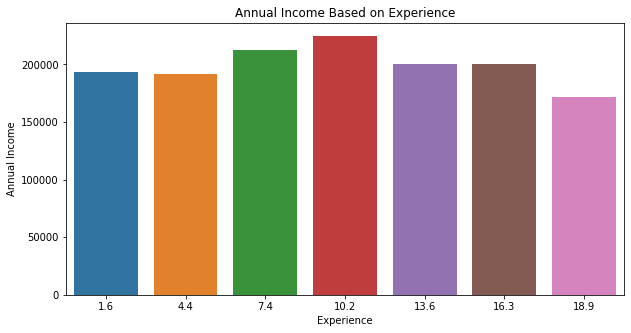

In [57]:
exp1 = pd.cut(df["Experience"], bins = list(np.arange(0,23,3)))
print("Mean of Annual Income by the Age are :\n",df.groupby(exp1)["Annual_income"].mean())

cat2 = round(df[['Experience',"Annual_income"]].groupby(pd.cut(df["Experience"], bins = list(np.arange(0,23,3))), as_index=False).mean(),1)
plt.figure(figsize =(10,5))
sns.barplot(x = "Experience", y = "Annual_income", data = cat2)
plt.title("Annual Income Based on Experience")
plt.xlabel("Experience")
plt.ylabel("Annual Income")
plt.show()

Mean of Annual Income by the Age are :
 Age
(20, 30]    207417.857143
(30, 40]    192075.371287
(40, 50]    213460.213235
(50, 60]    171785.204082
(60, 70]    153211.764706
Name: Annual_income, dtype: float64


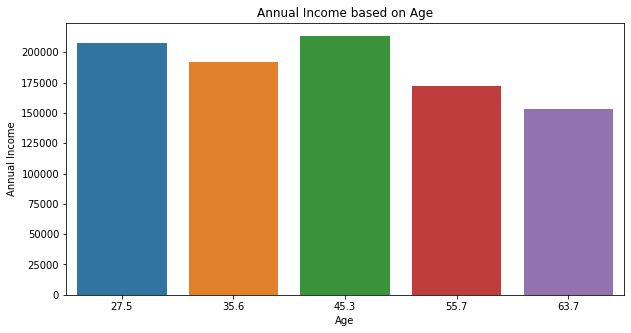

In [58]:
age = pd.cut(df["Age"], bins = [20,30,40,50,60,70])
print("Mean of Annual Income by the Age are :\n",df.groupby(age)["Annual_income"].mean())

cat4 = round(df[['Age',"Annual_income"]].groupby(pd.cut(df["Age"], bins = [20,30,40,50,60,70]), as_index=False).mean(),1)
plt.figure(figsize =(10,5))
sns.barplot(x = "Age", y = "Annual_income", data = cat4)
plt.title("Annual Income based on Age")
plt.xlabel("Age")
plt.ylabel("Annual Income")
plt.show()

#####Multivariate Analysis

Mean of Annual Income by the Age are :
 Experience
(0, 2]      0.149798
(2, 4]      0.162791
(4, 6]      0.086294
(6, 8]      0.070513
(8, 10]     0.088000
(10, 12]    0.088235
(12, 14]    0.044444
(14, 16]    0.000000
(16, 18]    0.000000
(18, 20]    0.083333
Name: label, dtype: float64


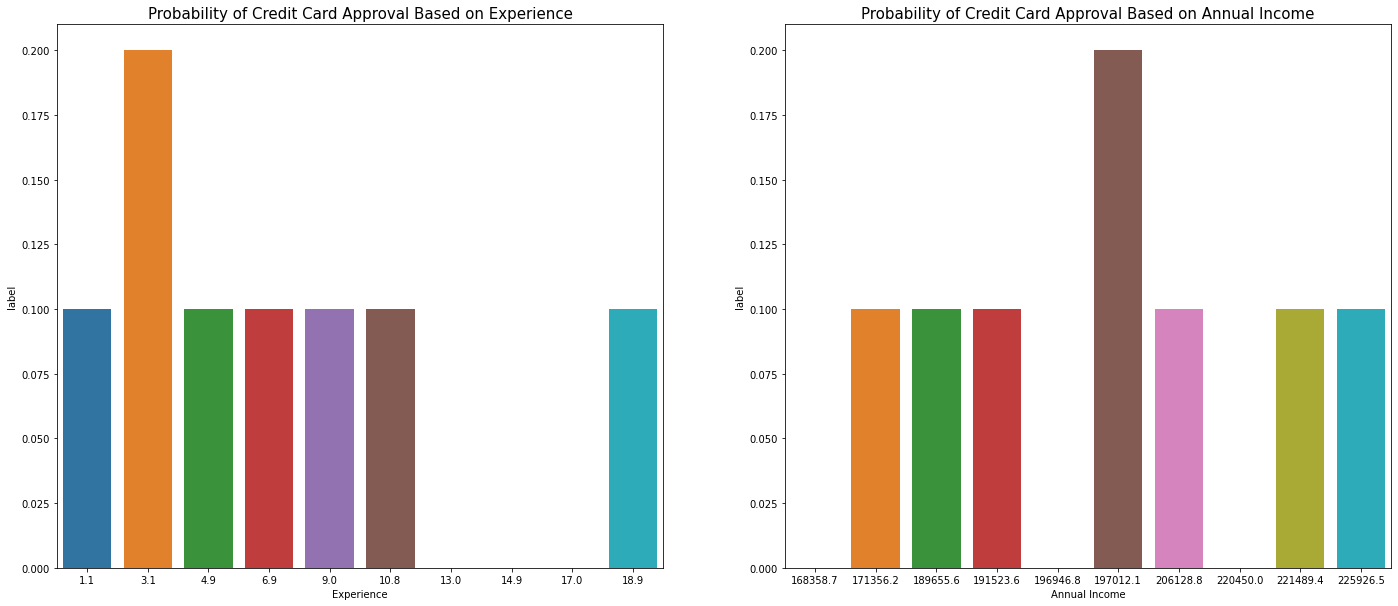

In [59]:
exp1 = pd.cut(df["Experience"], bins = list(np.arange(0,22,2)))
print("Mean of Annual Income by the Age are :\n",df.groupby(exp1)["label"].mean())

cat3 = round(df[['Experience',"Annual_income", "label"]].groupby(pd.cut(df["Experience"], bins = list(np.arange(0,22,2))), as_index=False).mean(),1)
plt.figure(figsize =(50,10))
plt.subplot(1, 4, 1)
sns.barplot(x = "Experience", y = "label", data = cat3)
plt.title("Probability of Credit Card Approval Based on Experience", fontsize = 15)
plt.xlabel("Experience")
plt.ylabel("label")

plt.subplot(1, 4, 2)
sns.barplot(x = "Annual_income", y = "label", data = cat3)
plt.title("Probability of Credit Card Approval Based on Annual Income", fontsize = 15)
plt.xlabel("Annual Income")
plt.ylabel("label")
plt.show()

- **OBSERVATIONS :-**
* People have 2 to 4 Year of Experience have 20% chances to get the Credit Card.
* Salary between 1.7 Lakhs to 2.25 Lakhs has 10% chances to get Credit Card.
* Salary around 1.9 Lakhs has 20% chances to get Credit Card.

#**FEATURE ENGINEERING & SELECTION**

#####Spliting Data into Dependent(y) and Independent(X) Variable

In [60]:
df1 = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [61]:
X = pd.get_dummies(df1, drop_first = True)

In [62]:
X.head()

,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Age,Experience,Family_Members,Type_Income_Pensioner,Type_Income_State servant,Type_Income_Working,EDUCATION_Higher education,EDUCATION_Incomplete higher,EDUCATION_Lower secondary,EDUCATION_Secondary / secondary special,Housing_type_House / apartment,Housing_type_Municipal apartment,Housing_type_Office apartment,Housing_type_Rented apartment,Housing_type_With parents
0,1.0,1,1,0,180000.0,51.0,0.0,2,1,0,0,1,0,0,0,1,0,0,0,0
1,0.0,1,0,0,315000.0,37.0,1.6,2,0,0,0,1,0,0,0,1,0,0,0,0
4,0.0,1,0,0,315000.0,37.0,1.6,2,0,0,0,1,0,0,0,1,0,0,0,0
6,0.0,1,0,0,315000.0,37.0,1.6,2,0,0,0,1,0,0,0,1,0,0,0,0
7,0.0,0,0,0,180000.0,61.0,0.0,2,1,0,0,0,0,0,1,1,0,0,0,0


#####Feature Selection - Pending

In [63]:
df.corr()

,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Age,Experience,Family_Members,label
GENDER,1.000000,0.366000,-0.046590,0.068441,0.213587,-0.182753,0.036791,0.109759,0.051808
Car_Owner,0.366000,1.000000,-0.000509,0.068853,0.208379,-0.133944,0.043919,0.129453,-0.022255
Propert_Owner,-0.046590,-0.000509,1.000000,-0.019240,0.057085,0.127433,-0.058612,-0.011664,-0.002870
CHILDREN,0.068441,0.068853,-0.019240,1.000000,0.101543,-0.326757,0.148197,0.863185,-0.028371
Annual_income,0.213587,0.208379,0.057085,0.101543,1.000000,-0.113484,0.104760,0.061569,0.011205
Age,-0.182753,-0.133944,0.127433,-0.326757,-0.113484,1.000000,-0.186417,-0.290513,0.048903
Experience,0.036791,0.043919,-0.058612,0.148197,0.104760,-0.186417,1.000000,0.179529,-0.104550
Family_Members,0.109759,0.129453,-0.011664,0.863185,0.061569,-0.290513,0.179529,1.000000,-0.040733
label,0.051808,-0.022255,-0.002870,-0.028371,0.011205,0.048903,-0.104550,-0.040733,1.000000


In [64]:
# X_train.corr()

In [65]:
from sklearn.ensemble import ExtraTreesRegressor
model = ExtraTreesRegressor()
model.fit(X,y)

ExtraTreesRegressor()

In [66]:
print(model.feature_importances_)

[0.03582542 0.05667533 0.04226084 0.04553003 0.20612642 0.20353692
 0.15133104 0.0771006  0.02532533 0.01341701 0.03208407 0.0246181
 0.00726416 0.0066674  0.02848689 0.01097035 0.01240493 0.00910695
 0.0057424  0.00552581]


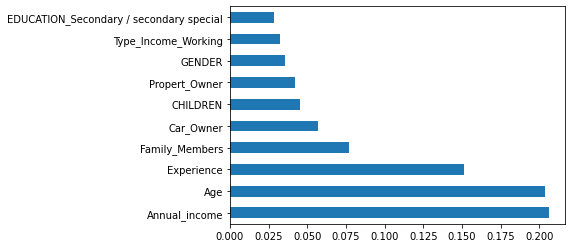

In [67]:
feat_important = pd.Series(model.feature_importances_, index = X.columns)
feat_important.nlargest(10).plot(kind="barh")
plt.show()

In [68]:
## Drop irrelevant columns.

#####Splitting data into Training and Test data

In [83]:
L = df.iloc[:,:-1]
m = df.iloc[:,-1]

In [84]:
#import train test split from sklearn libraries.
#Train size : 75% and Test size : 25% with random state = 42
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(L, m, test_size=0.25, random_state=0)

In [85]:
print("Train : ",X_train.shape, y_train.shape)
print("Test : ",X_test.shape, y_test.shape)

Train :  (1048, 11) (1048,)
Test :  (350, 11) (350,)


Observation


*   Numerical Feature : Gender, Car_Owner, Propert_Owner, Children, Annual_income, Age, Experience, Family_Members.
*   Categorical Feature : Type_Income, Education, Marital_status, Housing_type.



In [71]:
## mut_feature 
## SelectKBest
## chi2

#**ML MODEL**

#####Feature Scaling

In [92]:
#Extracting out the Numerical and Categorical Feature into "num_features" and "cat_features".   
num_features = X_train.select_dtypes(exclude="object").columns
cat_features = X_train.select_dtypes(include="object").columns
print(num_features)
print(cat_features)


#Importing OneHotEncoding and StandardScaler Library for Scaling the dataset.
from sklearn.preprocessing import OneHotEncoder, StandardScaler, OrdinalEncoder


#Importing "ColumnTransformer" : Used to create and apply separate transformers for numerical and categorical data.
from sklearn.compose import ColumnTransformer

#Crating a object for "StandardScaler()" and "OneHotEncoder()".
numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder()
oe = OrdinalEncoder()

#Transforming for Numerical and Categorical data.
preprocessor = ColumnTransformer(
    [
        ("OneHotEncoder", oh_transformer, cat_features),
         ("StandardScaler", numeric_transformer, num_features),        
    ]
)

# transformer = ColumnTransformer(
#     [
#         ("Num1", oe(categories=[["House / apartment", "With parents", "Municipal apartment", 
#                                 "Rented apartment", "Office apartment", "Co-op apartment"]]), "Housing_type" ),
#         ("Num2", oh_transformer(sparse = False, drop = "first"), ["Type_Income", "EDUCATION"]),
#         ("Num3", numeric_transformer, num_features)
#     ]
    
# )

#Using fit_transform to Standardize the train data
X_train = preprocessor.fit_transform(X_train)

#"transform" only to avoid data leakage
X_test = preprocessor.transform(X_test)

Index(['GENDER', 'Car_Owner', 'Propert_Owner', 'CHILDREN', 'Annual_income',
       'Age', 'Experience', 'Family_Members'],
      dtype='object')
Index(['Type_Income', 'EDUCATION', 'Housing_type'], dtype='object')


###Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
log_reg = LogisticRegression()
log_reg.fit(X_train,y_train)
y_pred = log_reg.predict(X_test)
Log_reg_untune = accuracy_score(y_pred, y_test)*100
print("Accuracy of Logistic Regression Model : {}%".format(round(accuracy_score(y_pred, y_test)*100)))
print("Classification Report of Logistic Regression Model : \n",classification_report(y_pred, y_test))

Accuracy of Logistic Regression Model : 89%
Classification Report of Logistic Regression Model : 
               precision    recall  f1-score   support

           0       1.00      0.89      0.94       349
           1       0.00      0.00      0.00         1

    accuracy                           0.89       350
   macro avg       0.50      0.45      0.47       350
weighted avg       0.99      0.89      0.94       350



<AxesSubplot:xlabel='label', ylabel='Density'>

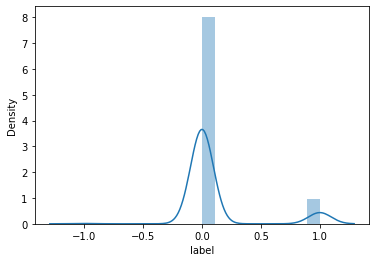

In [ ]:
sns.distplot(y_test - y_pred)

####Model Evaluation Metrics

In [ ]:
confusion_matrix(y_pred, y_test)

array([[312,  37],
       [  1,   0]])

####Hyper Parameter Tuning for Logistic Regression

In [ ]:
from sklearn.model_selection import GridSearchCV
parameter = {"penalty":["l1", "l2", "elasticnet"],
             "C" : [1,2,3,4,5,6,10,20,40,50],
             "max_iter" : [100,200,300,400,500]}
Classfier_Reg = GridSearchCV(log_reg,param_grid=parameter, scoring="accuracy", cv=10)

In [ ]:
Classfier_Reg.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'C': [1, 2, 3, 4, 5, 6, 10, 20, 40, 50],
                         'max_iter': [100, 200, 300, 400, 500],
                         'penalty': ['l1', 'l2', 'elasticnet']},
             scoring='accuracy')

In [ ]:
print(Classfier_Reg.best_params_)

{'C': 1, 'max_iter': 100, 'penalty': 'l2'}


In [ ]:
print(Classfier_Reg.best_score_)

0.887408424908425


In [ ]:
y_pred_tune_grid = Classfier_Reg.predict(X_test)

In [ ]:
Log_reg_tune = accuracy_score(y_pred_tune_grid, y_test)*100
round(accuracy_score(y_pred_tune_grid, y_test)*100)

89

In [ ]:
confusion_matrix(y_pred_tune_grid, y_test)

array([[312,  37],
       [  1,   0]])

Improvment in FP

In [ ]:
print(classification_report(y_pred_tune_grid, y_test))

              precision    recall  f1-score   support

           0       1.00      0.89      0.94       349
           1       0.00      0.00      0.00         1

    accuracy                           0.89       350
   macro avg       0.50      0.45      0.47       350
weighted avg       0.99      0.89      0.94       350



Verification after tuning

In [ ]:
log_reg_tune = LogisticRegression(penalty="l2",C = 4, max_iter=100, random_state=0)
log_reg_tune.fit(X_train,y_train)
y_pred_tune = log_reg_tune.predict(X_test)
print("Accuracy of Logistic Regression Model : {}%".format(round(accuracy_score(y_pred_tune, y_test)*100)))
print("Classification Report of Logistic Regression Model : \n",classification_report(y_pred_tune, y_test))

Accuracy of Logistic Regression Model : 89%
Classification Report of Logistic Regression Model : 
               precision    recall  f1-score   support

           0       1.00      0.89      0.94       349
           1       0.00      0.00      0.00         1

    accuracy                           0.89       350
   macro avg       0.50      0.45      0.47       350
weighted avg       0.99      0.89      0.94       350



###Decision Tree Classifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dec_tree = DecisionTreeClassifier()
dec_tree.fit(X_train,y_train)
y_pred_dec = dec_tree.predict(X_test)
dec_tree_untune = accuracy_score(y_pred_dec, y_test)*100
accuracy_score(y_pred_dec, y_test)*100

88.0

<AxesSubplot:xlabel='label', ylabel='Density'>

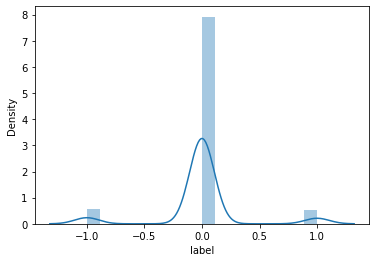

In [ ]:
sns.distplot(y_test - y_pred_dec)

In [ ]:
# from sklearn import tree
# tree.plot_tree(dec_tree)

#####Hyper Parameter Tuning for Decision Tree Classifier

In [ ]:
from sklearn.model_selection import GridSearchCV
parameter_dtc = {"criterion" : ["gini", "entropy", "log_loss"],
                 "splitter" : ["best", "random"],
                 "max_depth" : [1,2,3,4,5],
                 "max_features" : ["auto", "sqrt", "log2"],
                 "ccp_alpha" : [1,2,3,4,5,6,7]}
Classfier_dtc = GridSearchCV(dec_tree,param_grid=parameter_dtc, scoring="accuracy", cv=5)

In [ ]:
Classfier_dtc.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'ccp_alpha': [1, 2, 3, 4, 5, 6, 7],
                         'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [1, 2, 3, 4, 5],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'splitter': ['best', 'random']},
             scoring='accuracy')

In [ ]:
print(Classfier_dtc.best_params_)

{'ccp_alpha': 1, 'criterion': 'gini', 'max_depth': 1, 'max_features': 'auto', 'splitter': 'best'}


In [ ]:
print(Classfier_dtc.best_score_)

0.8902665755297334


In [ ]:
y_pred_tune_dtc = Classfier_dtc.predict(X_test)

In [ ]:
dec_tree_tune = accuracy_score(y_pred_tune_dtc, y_test)*100
accuracy_score(y_pred_tune_dtc, y_test)*100

89.42857142857143

In [ ]:
print(classification_report(y_pred_tune_dtc, y_test))

              precision    recall  f1-score   support

           0       1.00      0.89      0.94       350
           1       0.00      0.00      0.00         0

    accuracy                           0.89       350
   macro avg       0.50      0.45      0.47       350
weighted avg       1.00      0.89      0.94       350



###KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train,y_train)
y_pred_knn = knn.predict(X_test)
knn_untune = accuracy_score(y_pred_knn, y_test)*100
accuracy_score(y_pred_knn, y_test)*100

90.0

<AxesSubplot:xlabel='label', ylabel='Density'>

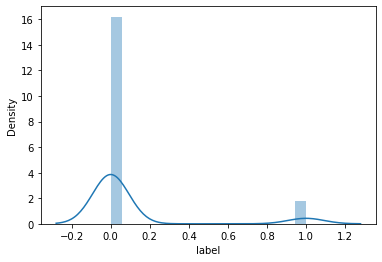

In [ ]:
sns.distplot(y_test - y_pred_knn)

#####Hyper Parameter Tuning for KNN

In [ ]:
from sklearn.model_selection import GridSearchCV
parameter_knn = {"n_neighbors" : list(np.arange(1,30,1)),
                 "weights" : ["uniform", "distance"],
                 "algorithm" : ["auto", "ball_tree", "kd_tree", "brute"]}
Classfier_knn = GridSearchCV(knn,param_grid=parameter_knn, scoring="accuracy", cv=5)

In [ ]:
Classfier_knn.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [ ]:
print(Classfier_knn.best_params_)

{'algorithm': 'auto', 'n_neighbors': 22, 'weights': 'distance'}


In [ ]:
print(Classfier_knn.best_score_)

0.9217543859649122


In [ ]:
y_pred_tune_knn = Classfier_knn.predict(X_test)

In [ ]:
knn_tune = accuracy_score(y_pred_tune_knn, y_test)*100
accuracy_score(y_pred_tune_knn, y_test)*100

92.28571428571428

In [ ]:
print(classification_report(y_pred_tune_knn, y_test))

              precision    recall  f1-score   support

           0       1.00      0.92      0.96       338
           1       0.30      0.92      0.45        12

    accuracy                           0.92       350
   macro avg       0.65      0.92      0.70       350
weighted avg       0.97      0.92      0.94       350



###Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
random_forest = RandomForestClassifier()
random_forest.fit(X_train,y_train)
y_pred_rfc = random_forest.predict(X_test)
random_forest_untune = accuracy_score(y_pred_rfc, y_test)*100
accuracy_score(y_pred_rfc, y_test)*100

92.0

<AxesSubplot:xlabel='label', ylabel='Density'>

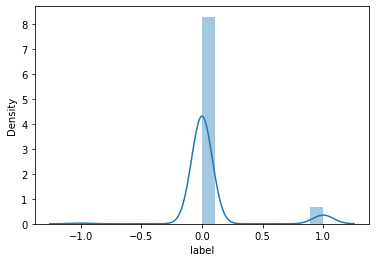

In [ ]:
sns.distplot(y_test - y_pred_rfc)

#####Hyper Parameter Tuning for Random Forest Classifier

In [ ]:
from sklearn.model_selection import GridSearchCV
parameter_rfc = {"n_estimators" : list(np.arange(10,15,1)),
                 "criterion" : ["gini", "entropy", "log_loss"],
                 "max_depth" : list(np.arange(0,14))}
Classfier_rfc = GridSearchCV(random_forest,param_grid=parameter_rfc, scoring="accuracy", cv=5)

In [ ]:
Classfier_rfc.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                       13],
                         'n_estimators': [10, 11, 12, 13, 14]},
             scoring='accuracy')

In [ ]:
print(Classfier_rfc.best_params_)

{'criterion': 'log_loss', 'max_depth': 13, 'n_estimators': 14}


In [ ]:
print(Classfier_rfc.best_score_)

0.9141216678058784


In [ ]:
y_pred_tune_rfc = Classfier_rfc.predict(X_test)

In [ ]:
random_forest_tune = accuracy_score(y_pred_tune_rfc, y_test)*100
accuracy_score(y_pred_tune_rfc, y_test)*100

90.57142857142857

In [ ]:
print(classification_report(y_pred_tune_rfc, y_test))

              precision    recall  f1-score   support

           0       0.99      0.91      0.95       340
           1       0.19      0.70      0.30        10

    accuracy                           0.91       350
   macro avg       0.59      0.81      0.62       350
weighted avg       0.97      0.91      0.93       350



###XGBoost

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
grad_boost = GradientBoostingClassifier()
grad_boost.fit(X_train,y_train)
y_pred_gbc = grad_boost.predict(X_test)
grad_boost_untune = accuracy_score(y_pred_gbc, y_test)*100
accuracy_score(y_pred_gbc, y_test)*100

87.71428571428571

<AxesSubplot:xlabel='label', ylabel='Density'>

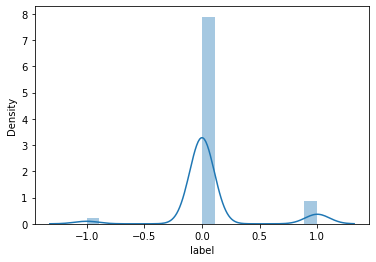

In [ ]:
sns.distplot(y_test - y_pred_gbc)

###SVM

In [ ]:
from sklearn.svm import SVC
svm = SVC()
svm.fit(X_train,y_train)
y_pred_svm = svm.predict(X_test)
svm_untune = accuracy_score(y_pred_svm, y_test)*100
accuracy_score(y_pred_svm, y_test)*100

89.42857142857143

<AxesSubplot:xlabel='label', ylabel='Density'>

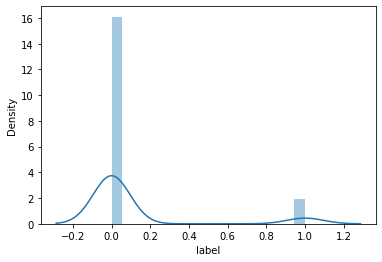

In [ ]:
sns.distplot(y_test - y_pred_svm)

#####Hyper Parameter Tuning for SVC

In [ ]:
from sklearn.model_selection import GridSearchCV
parameter_svm = {'C': [0.1, 1, 10, 100, 1000], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf', 'poly', 'sigmoid']}
Classfier_svm = GridSearchCV(svm,param_grid=parameter_svm,refit=True, verbose=2)

In [ ]:
Classfier_svm.fit(X_train, y_train)

Fitting 5 folds for each of 75 candidates, totalling 375 fits
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.1s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.0s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.1s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.1s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.1s
[CV] END .....................C=0.1, gamma=1, kernel=sigmoid; total time=   0.0s
[CV] END .....................C=0.1, gamma=1, k

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf', 'poly', 'sigmoid']},
             verbose=2)

In [ ]:
print(Classfier_svm.best_params_)

{'C': 1, 'gamma': 1, 'kernel': 'rbf'}


In [ ]:
print(Classfier_svm.best_estimator_)

SVC(C=1, gamma=1)


In [ ]:
print(Classfier_svm.best_score_)

0.903613579403053


In [ ]:
y_pred_tune_svm = Classfier_svm.predict(X_test)

In [ ]:
svm_tune = accuracy_score(y_pred_tune_svm, y_test)*100
accuracy_score(y_pred_tune_svm, y_test)*100

91.71428571428571

In [ ]:
print(classification_report(y_pred_tune_svm, y_test))

              precision    recall  f1-score   support

           0       1.00      0.92      0.96       340
           1       0.24      0.90      0.38        10

    accuracy                           0.92       350
   macro avg       0.62      0.91      0.67       350
weighted avg       0.98      0.92      0.94       350



#**ACCURACY : GRAPH**

#####Untuned Algorithm Graph

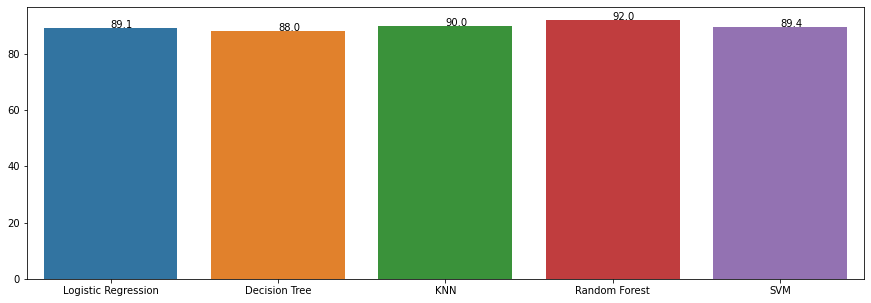

In [ ]:
untuned_algo = [Log_reg_untune, dec_tree_untune, knn_untune, random_forest_untune, svm_untune]
Algo_value_untune = []
for i in untuned_algo:
  Algo_value_untune.append(round(i,1))
Algo = ["Logistic Regression", "Decision Tree" , "KNN", "Random Forest", "SVM"]
plt.figure(figsize=(15,5))
def addlabels_untune(x,y):
    for i in range(len(x)):
        plt.text(i,y[i],y[i], horizontalalignment = "left")
sns.barplot(Algo,untuned_algo)
addlabels_untune(Algo, Algo_value_untune)

#####Tuned Algorithm Graph

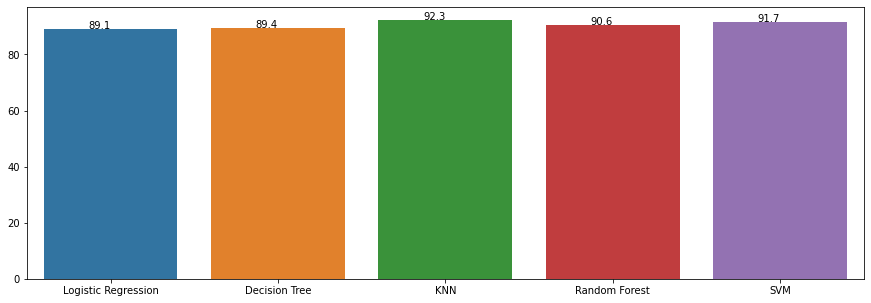

In [ ]:
tuned_algo = [Log_reg_tune, dec_tree_tune, knn_tune, random_forest_tune, svm_tune]
Algo_value_tune = []
for i in tuned_algo:
  Algo_value_tune.append(round(i,1))
Algo = ["Logistic Regression", "Decision Tree" , "KNN", "Random Forest", "SVM"]
plt.figure(figsize=(15,5))
def addlabels_tune(x,y):
    for i in range(len(x)):
        plt.text(i,y[i],y[i], horizontalalignment = "right")
sns.barplot(Algo,Algo_value_tune)
addlabels_tune(Algo, Algo_value_tune)

#####Comparision 

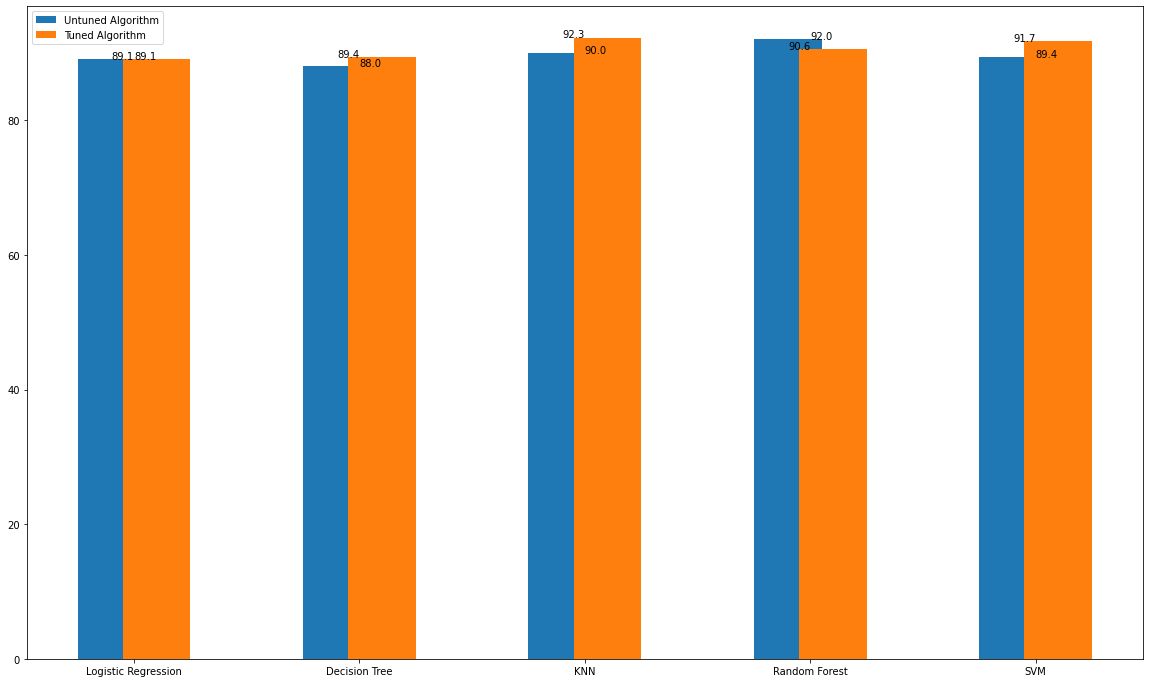

In [ ]:
plt.figure(figsize=(20,12))
X_label_algo = np.arange(len(Algo))
plt.bar(X_label_algo-0.1, untuned_algo, 0.3, label = "Untuned Algorithm")
plt.bar(X_label_algo+0.1, tuned_algo, 0.3, label = "Tuned Algorithm" )
plt.xticks(X_label_algo, Algo)
plt.legend()
addlabels_tune(Algo, Algo_value_tune)
addlabels_untune(Algo, Algo_value_untune)

#Imbalance Data